In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [22]:
# importar e analisar os dataset

urgencias = pd.read_csv("./data/atendimentos-em-urgencia-triagem-manchester.csv", sep=';')
urgencias.head(3)


,Período,Região,Instituição,Localização Geográfica,Nº Atendimentos em Urgência SU Triagem Manchester -Vermelha,Nº Atendimentos em Urgência SU Triagem Manchester -Laranja,Nº Atendimentos em Urgência SU Triagem Manchester -Amarela,Nº Atendimentos em Urgência SU Triagem Manchester -Verde,Nº Atendimentos em Urgência SU Triagem Manchester -Azul,Nº Atendimentos em Urgência SU Triagem Manchester -Branca,Nº Atendimentos s\ Triagem Manchester
0,2013-01,Região de Saúde do Alentejo,"Unidade Local de Saúde do Norte Alentejano, EPE","39.3003425, -7.4263845",35.0,880.0,2326.0,4441.0,26.0,224.0,25.0
1,2013-01,Região de Saúde do Centro,"Centro Hospitalar Universitário Cova da Beira,...","40.2804158, -7.4922407",10.0,247.0,2802.0,1910.0,15.0,149.0,2099.0
2,2013-01,Região de Saúde do Centro,"Unidade Local de Saúde da Guarda, EPE","40.5309916, -7.2734793",28.0,679.0,2484.0,3375.0,40.0,429.0,321.0


In [ ]:
# ydata-profiling (importar, visualizar, gerar relatorio)
from ydata_profiling import ProfileReport
profile = ProfileReport(urgencias, title="Dataset Urgencias")
profile.to_file("Dataset Urgencias.html")

In [ ]:
# Visualizar as 5 primeiras e ultimas linhas
display(urgencias)

In [ ]:
# Tamanho da base
urgencias.shape


In [18]:
# Tipo dos dados e valores varios
urgencias.dtypes
urgencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5220 entries, 0 to 5219
Data columns (total 11 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Período                                                      5220 non-null   object 
 1   Região                                                       5220 non-null   object 
 2   Instituição                                                  5220 non-null   object 
 3   Localização Geográfica                                       5220 non-null   object 
 4   Nº Atendimentos em Urgência SU Triagem Manchester -Vermelha  5117 non-null   float64
 5   Nº Atendimentos em Urgência SU Triagem Manchester -Laranja   5117 non-null   float64
 6   Nº Atendimentos em Urgência SU Triagem Manchester -Amarela   5117 non-null   float64
 7   Nº Atendimentos em Urgência SU Triagem Manchester -Verde     5117 non-null   f

In [19]:
# Valores vazios por coluna
urgencias.isnull().sum()

Período                                                          0
Região                                                           0
Instituição                                                      0
Localização Geográfica                                           0
Nº Atendimentos em Urgência SU Triagem Manchester -Vermelha    103
Nº Atendimentos em Urgência SU Triagem Manchester -Laranja     103
Nº Atendimentos em Urgência SU Triagem Manchester -Amarela     103
Nº Atendimentos em Urgência SU Triagem Manchester -Verde       103
Nº Atendimentos em Urgência SU Triagem Manchester -Azul        107
Nº Atendimentos em Urgência SU Triagem Manchester -Branca      247
Nº Atendimentos s\ Triagem Manchester                          627
dtype: int64

In [ ]:
# Resumo estatistica
urgencias.describe()

,Nº Atendimentos em Urgência SU Triagem Manchester -Vermelha,Nº Atendimentos em Urgência SU Triagem Manchester -Laranja,Nº Atendimentos em Urgência SU Triagem Manchester -Amarela,Nº Atendimentos em Urgência SU Triagem Manchester -Verde,Nº Atendimentos em Urgência SU Triagem Manchester -Azul,Nº Atendimentos em Urgência SU Triagem Manchester -Branca,Nº Atendimentos s\ Triagem Manchester
count,5117.000000,5117.000000,5117.000000,5117.000000,5113.000000,4973.000000,4593.000000
mean,282.086379,7865.755325,33696.664452,26901.665429,1056.947585,2354.598834,11466.780318
std,235.481878,6434.620630,24577.451834,21987.450560,1311.373198,3539.743671,20242.972532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,107.000000,3136.000000,14661.000000,10702.000000,244.000000,538.000000,136.000000
50%,215.000000,6299.000000,28003.000000,21201.000000,623.000000,1245.000000,967.000000
75%,386.000000,10922.000000,47557.000000,36977.000000,1326.000000,2763.000000,13217.000000
max,1550.000000,54005.000000,159367.000000,155589.000000,33697.000000,39719.000000,237032.000000


array([[<Axes: title={'center': 'Nº Atendimentos em Urgência SU Triagem Manchester -Vermelha'}>,
        <Axes: title={'center': 'Nº Atendimentos em Urgência SU Triagem Manchester -Laranja'}>,
        <Axes: title={'center': 'Nº Atendimentos em Urgência SU Triagem Manchester -Amarela'}>],
       [<Axes: title={'center': 'Nº Atendimentos em Urgência SU Triagem Manchester -Verde'}>,
        <Axes: title={'center': 'Nº Atendimentos em Urgência SU Triagem Manchester -Azul'}>,
        <Axes: title={'center': 'Nº Atendimentos em Urgência SU Triagem Manchester -Branca'}>],
       [<Axes: title={'center': 'Nº Atendimentos s\\ Triagem Manchester'}>,
        <Axes: >, <Axes: >]], dtype=object)

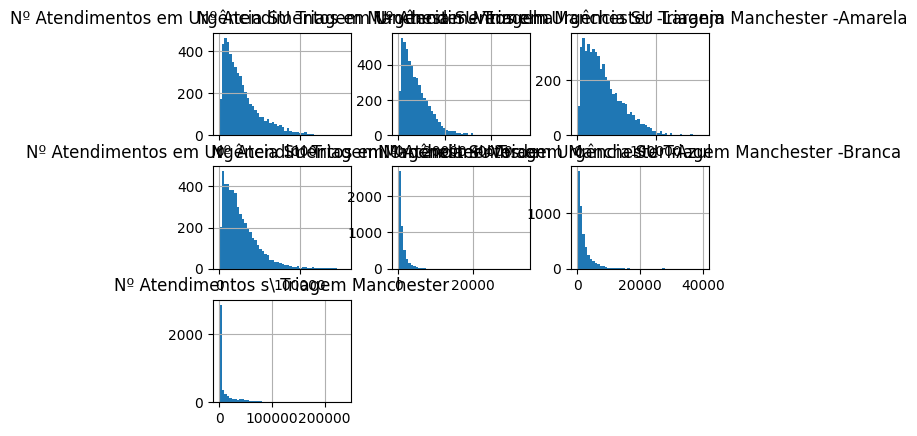

In [ ]:
# Visualização

urgencias.hist(bins=50)

<Axes: >

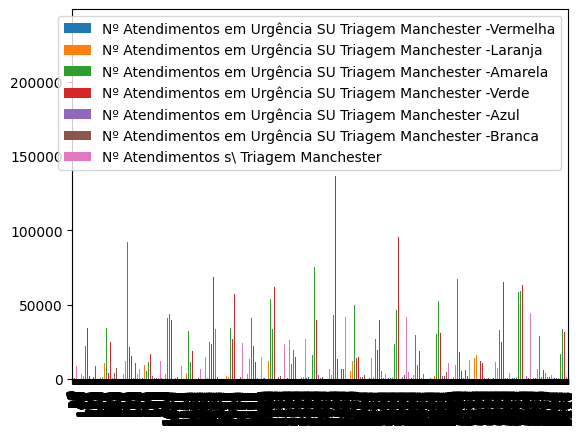

In [31]:
urgencias.plot.bar()

<Axes: xlabel='Período,Região,Instituição,Localização Geográfica,Nº Atendimentos em Urgência SU Triagem Manchester -Vermelha,Nº Atendimentos em Urgência SU Triagem Manchester -Laranja,Nº Atendimentos em Urgência SU Triagem Manchester -Amarela,Nº Atendimentos em Urgência SU Triagem Manchester -Verde,Nº Atendimentos em Urgência SU Triagem Manchester -Azul,Nº Atendimentos em Urgência SU Triagem Manchester -Branca,Nº Atendimentos s\\ Triagem Manchester'>

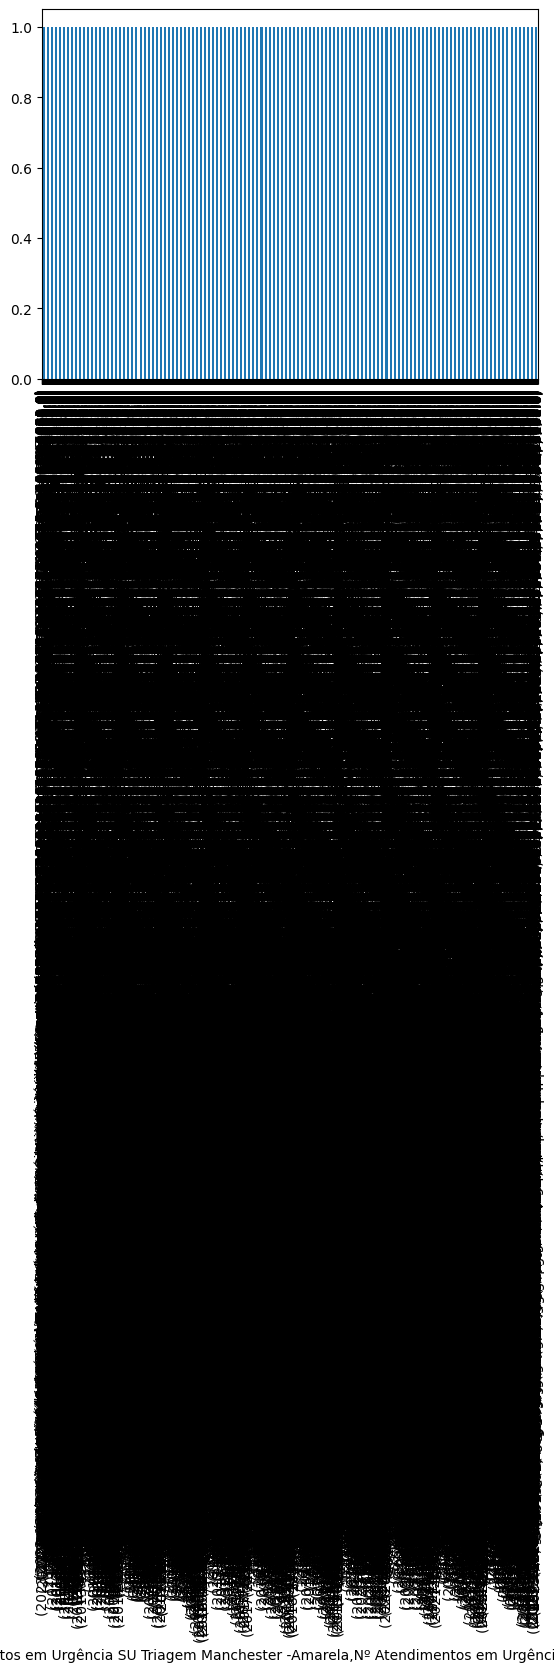

In [32]:
urgencias.value_counts().plot.bar()

<Axes: ylabel='Density'>

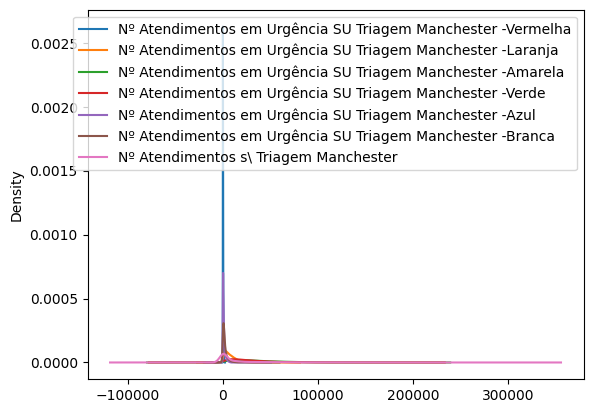

In [33]:
urgencias.plot.kde()